Credit Card Transactions Fraud Detection Dataset
'''https://www.kaggle.com/datasets/kartik2112/fraud-detection'''

# import

## import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

## import data

In [2]:
# path = r"C:\Users\Sajad\Projects\DS-SBU-ASSIGNMENT\TASK4\data"
# train_df = pd.read_csv(path + r"\fraudTrain.csv")
# test_df = pd.read_csv(path + r"\fraudTest.csv" )

In [3]:
train_df = pd.read_csv("/kaggle/input/fraud-detection/fraudTrain.csv")
test_df = pd.read_csv("/kaggle/input/fraud-detection/fraudTest.csv")

# EDA

In [4]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


**Unnamed: 0** : This column seems to be an index or identifier for each row in the dataset.

**trans_date_trans_time** : The date and time of the transaction in the format 'YYYY-MM-DD HH:MM:SS'.

**cc_num** : Credit card number used in the transaction.

**merchant** : The name or identifier of the merchant involved in the transaction.

**category** : The category or type of transaction (e.g., grocery, entertainment, gas_transport, misc_pos).

**amt** : The transaction amount.

**first** : First name of the credit card holder.

**last** : Last name of the credit card holder.

**gender** : Gender of the credit card holder (M/F).

**street** : Street address of the credit card holder.


**lat** : Latitude of the credit card holder's location.

**long** : Longitude of the credit card holder's location.

**city_pop** : Population of the city where the credit card holder is located.

**job** : Occupation or job title of the credit card holder.

**dob** : Date of birth of the credit card holder.

**trans_num** : Transaction number or identifier.

**unix_time** : Unix timestamp representing the time of the transaction.

**merch_lat**: Latitude of the merchant's location.

**merch_long**: Longitude of the merchant's location.

**is_fraud**: Binary column indicating whether the transaction is flagged as fraudulent (1) or not (0).s flagged as fraudulent (1) or not (0).is flagged as fraudulent (1) or not (0).

In [6]:
train_df.set_index("Unnamed: 0", inplace=True)
test_df.set_index("Unnamed: 0", inplace=True)

In [7]:
train_df.zip.value_counts()

zip
73754    3646
34112    3613
48088    3597
82514    3527
49628    3123
         ... 
46510       7
16041       7
38915       7
10018       7
23523       7
Name: count, Length: 970, dtype: int64

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [9]:
train_df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## trans_date_trans_time

Extract its informations and then removed

In [10]:
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])

train_df['year'] = train_df['trans_date_trans_time'].dt.year
train_df['month'] = train_df['trans_date_trans_time'].dt.month
train_df['day'] = train_df['trans_date_trans_time'].dt.day
train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
train_df['week_day'] = train_df["trans_date_trans_time"].dt.dayofweek

In [11]:
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])

test_df['year'] = test_df['trans_date_trans_time'].dt.year
test_df['month'] = test_df['trans_date_trans_time'].dt.month
test_df['day'] = test_df['trans_date_trans_time'].dt.day
test_df['hour'] = test_df['trans_date_trans_time'].dt.hour
test_df['week_day'] = test_df["trans_date_trans_time"].dt.dayofweek

### year

In [12]:
train_df.year.value_counts()

year
2019    924850
2020    371825
Name: count, dtype: int64

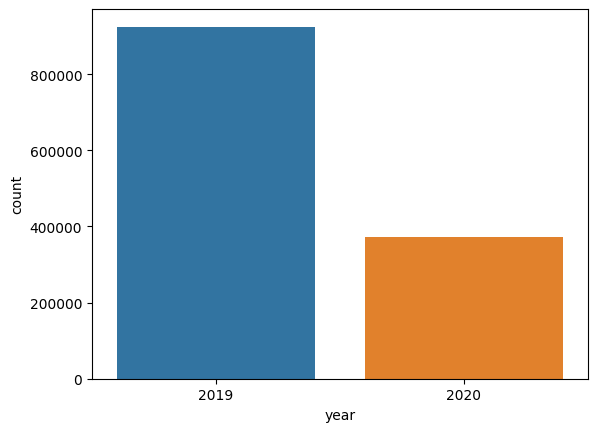

In [13]:
sns.countplot(data=train_df, x="year") 
plt.show();

In [14]:
contingency_table = pd.crosstab(train_df["year"], train_df["is_fraud"])
contingency_table

is_fraud,0,1
year,,
2019,919630,5220
2020,369539,2286


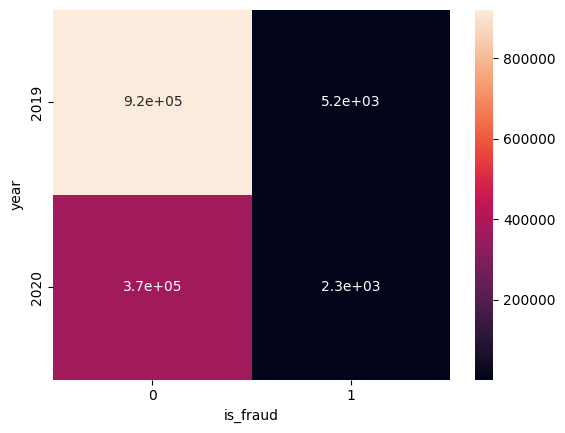

In [15]:
sns.heatmap(contingency_table, annot=True)
plt.show();

In [16]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("Reject the null hypothesis, there is evidence of a significant association.")
else:
    print("Fail to reject the null hypothesis, there is not enough evidence of a significant association.")

Reject the null hypothesis, there is evidence of a significant association.


In [17]:
train_df['year'] = np.where(train_df['year'] == 2019, 1, 0)
test_df['year'] = np.where(test_df['year'] == 2019, 1, 0)

### month

In [18]:
train_df["month"].value_counts()

month
5     146875
6     143811
3     143789
12    141060
4     134970
1     104727
2      97657
8      87359
7      86596
9      70652
11     70421
10     68758
Name: count, dtype: int64

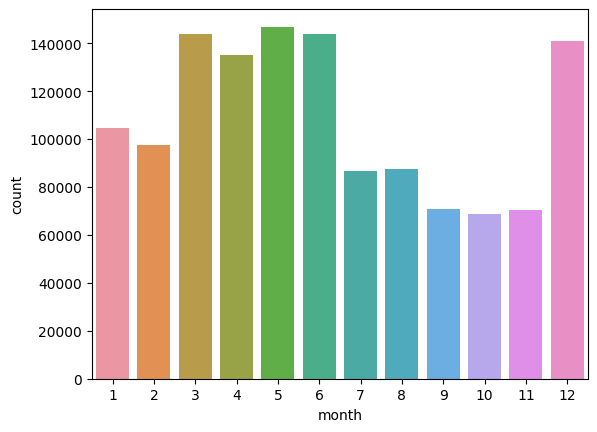

In [19]:
sns.countplot(data=train_df, x="month")
plt.show();

In [20]:
contingency_table = pd.crosstab(train_df["month"], train_df["is_fraud"])
contingency_table

is_fraud,0,1
month,,
1,103878,849
2,96804,853
3,142851,938
4,134292,678
5,145940,935
6,143123,688
7,86265,331
8,86977,382
9,70234,418


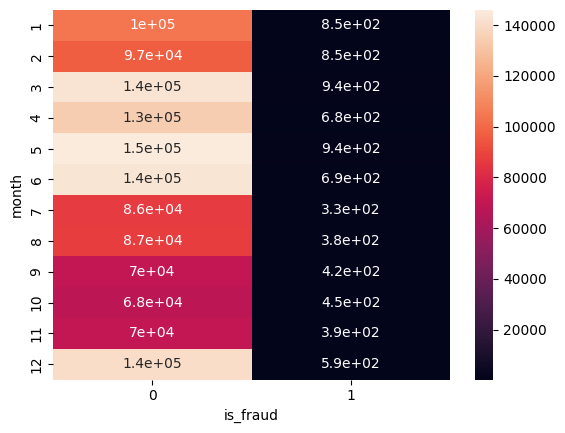

In [21]:
sns.heatmap(contingency_table, annot=True)
plt.show();

In [22]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("Reject the null hypothesis, there is evidence of a significant association.")
else:
    print("Fail to reject the null hypothesis, there is not enough evidence of a significant association.")

Reject the null hypothesis, there is evidence of a significant association.


In [23]:
train_df['month'] = np.sin(2 * np.pi * train_df['month'] / 12)
test_df['month'] = np.sin(2 * np.pi * test_df['month'] / 12)

### day

In [24]:
train_df["day"].value_counts()

day
1     47089
15    46213
8     46201
16    44894
2     44748
9     44685
7     44239
14    44015
28    43470
17    42272
22    42061
12    42001
10    41934
21    41930
5     41886
3     41842
4     41479
19    41466
11    41423
6     41420
24    41360
20    41188
13    41096
30    41019
18    40861
23    40815
26    40692
25    40374
27    39684
29    39617
31    24701
Name: count, dtype: int64

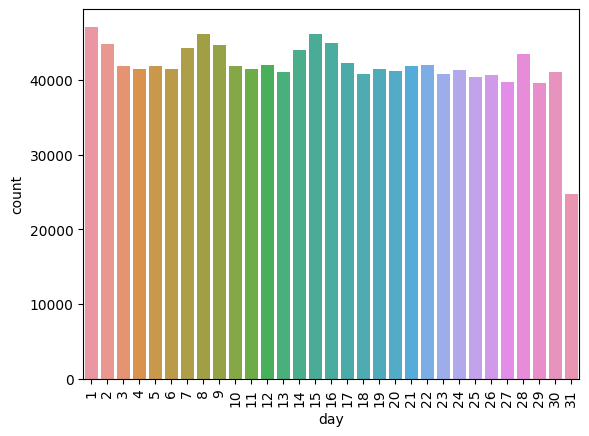

In [25]:
sns.countplot(data=train_df, x="day")
plt.xticks(rotation=90)
plt.show();

In [26]:
contingency_table = pd.crosstab(train_df["day"], train_df["is_fraud"])
contingency_table

is_fraud,0,1
day,,
1,46880,209
2,44484,264
3,41573,269
4,41256,223
5,41709,177
6,41262,158
7,43997,242
8,45938,263
9,44508,177


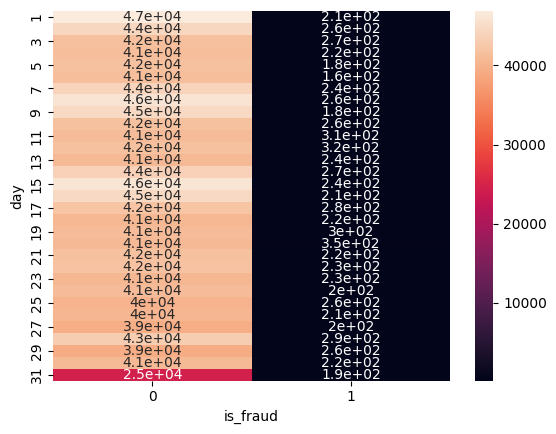

In [27]:
sns.heatmap(contingency_table, annot=True)
plt.show();

In [28]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("Reject the null hypothesis, there is evidence of a significant association.")
else:
    print("Fail to reject the null hypothesis, there is not enough evidence of a significant association.") 

Reject the null hypothesis, there is evidence of a significant association.


In [29]:
train_df['day'] = np.sin( 2 * np.pi * train_df['day'] / 31)
test_df['day'] = np.sin( 2 * np.pi * test_df['day'] / 31)

### hour

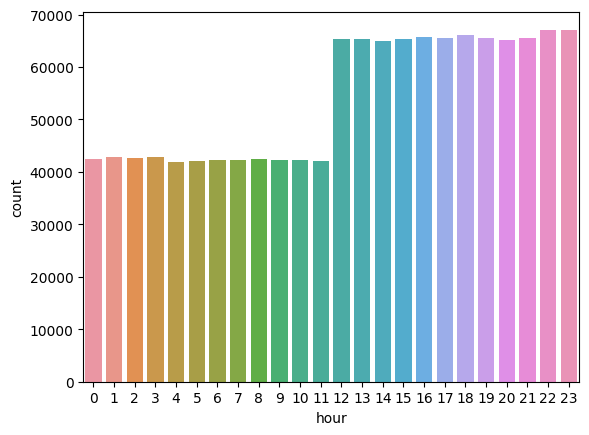

In [30]:
sns.countplot(data=train_df, x='hour')
plt.show();

In [31]:
contingency_table = pd.crosstab(train_df["hour"], train_df["is_fraud"])
contingency_table

is_fraud,0,1
hour,,
0,41867,635
1,42211,658
2,42031,625
3,42160,609
4,41817,46
5,42111,60
6,42260,40
7,42147,56
8,42456,49


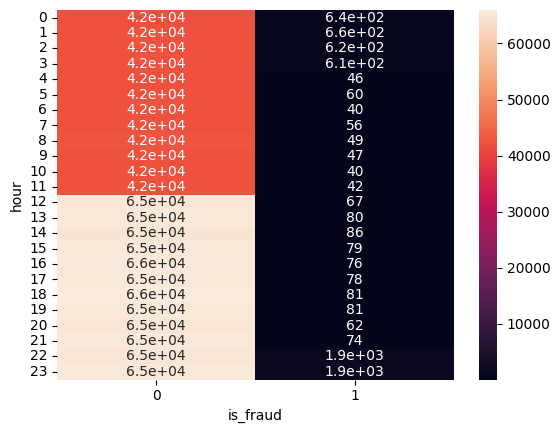

In [32]:
sns.heatmap(contingency_table, annot=True)
plt.show();

In [33]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("Reject the null hypothesis, there is evidence of a significant association.")
else:
    print("Fail to reject the null hypothesis, there is not enough evidence of a significant association.")

Reject the null hypothesis, there is evidence of a significant association.


In [34]:
train_df['hour'] = np.sin( 2 * np.pi * train_df['hour'] / 23)
test_df['hour'] = np.sin( 2 * np.pi * test_df['hour'] / 23)

### week_day

In [35]:
train_df['week_day'] = np.sin( 2 * np.pi * train_df['week_day'] / 7)
test_df['week_day'] = np.sin( 2 * np.pi * test_df['week_day'] / 7)

## cc-num

In [36]:
contingency_table = pd.crosstab(train_df["cc_num"], train_df["is_fraud"])
contingency_table

is_fraud,0,1
cc_num,,
60416207185,1509,9
60422928733,1519,12
60423098130,500,10
60427851591,514,14
60487002085,496,0
...,...,...
4958589671582726883,1476,0
4973530368125489546,1030,10
4980323467523543940,522,10


In [37]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("Reject the null hypothesis, there is evidence of a significant association.")
else:
    print("Fail to reject the null hypothesis, there is not enough evidence of a significant association.")

Reject the null hypothesis, there is evidence of a significant association.


## merchant

In [38]:
contingency_table = pd.crosstab(train_df["merchant"], train_df["is_fraud"])
contingency_table

is_fraud,0,1
merchant,,
fraud_Abbott-Rogahn,1841,3
fraud_Abbott-Steuber,1757,6
fraud_Abernathy and Sons,1747,4
fraud_Abshire PLC,1886,9
"fraud_Adams, Kovacek and Kuhlman",936,4
...,...,...
fraud_Zemlak Group,1280,17
"fraud_Zemlak, Tillman and Cremin",1802,2
fraud_Ziemann-Waters,1689,6


In [39]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("Reject the null hypothesis, there is evidence of a significant association.")
else:
    print("Fail to reject the null hypothesis, there is not enough evidence of a significant association.")

Reject the null hypothesis, there is evidence of a significant association.


## category

In [40]:
contingency_table = pd.crosstab(train_df["category"], train_df["is_fraud"])
contingency_table

is_fraud,0,1
category,,
entertainment,93781,233
food_dining,91310,151
gas_transport,131041,618
grocery_net,45318,134
grocery_pos,121895,1743
health_fitness,85746,133
home,122917,198
kids_pets,112796,239
misc_net,62372,915


In [41]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("Reject the null hypothesis, there is evidence of a significant association.")
else:
    print("Fail to reject the null hypothesis, there is not enough evidence of a significant association.")

Reject the null hypothesis, there is evidence of a significant association.


## amount

### default

In [42]:
train_df["amt"].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

<Axes: xlabel='amt'>

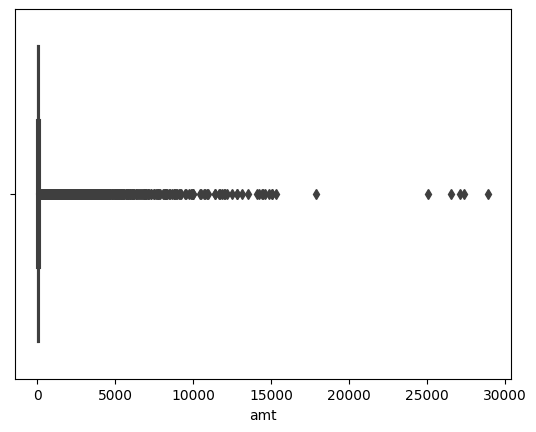

In [43]:
sns.boxplot(data=train_df, x='amt')

### RobustScaler

In [44]:
scaler = RobustScaler()
train_df["amt"] = scaler.fit_transform(train_df[["amt"]])
test_df["amt"] = scaler.transform(test_df[["amt"]])

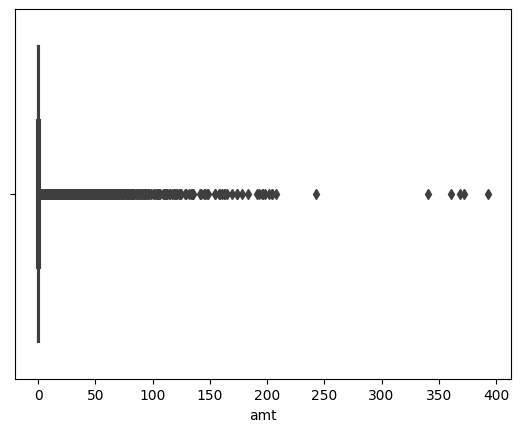

In [45]:
sns.boxplot(data=train_df, x="amt")
plt.show();

### PowerTransformer

In [46]:
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
power_transformer = PowerTransformer(method='yeo-johnson', standardize=False)

# Fit and transform the data
train_df["amt"] = power_transformer.fit_transform(train_df[["amt"]])
test_df["amt"] = power_transformer.transform(test_df[["amt"]])

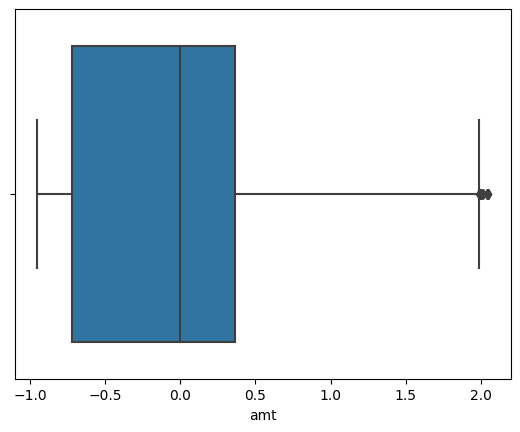

In [47]:
sns.boxplot(data=train_df, x="amt")
plt.show();

## gender

In [48]:
contingency_table = pd.crosstab(train_df["gender"], train_df["is_fraud"])
contingency_table

is_fraud,0,1
gender,,
F,706128,3735
M,583041,3771


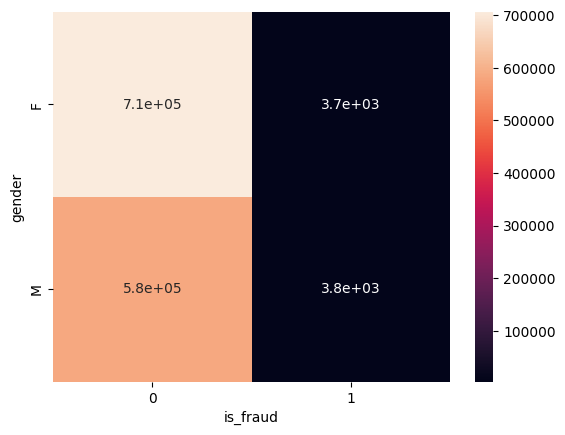

In [49]:
sns.heatmap(contingency_table, annot=True)
plt.show();

In [50]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("Reject the null hypothesis, there is evidence of a significant association.")
else:
    print("Fail to reject the null hypothesis, there is not enough evidence of a significant association.")

Reject the null hypothesis, there is evidence of a significant association.


In [51]:
train_df['gender'] = np.where(train_df['gender'] == "M", 1, 0)
test_df['gender'] = np.where(test_df['gender'] == "M", 1, 0)

## street

In [52]:
contingency_table = pd.crosstab(train_df["street"], train_df["is_fraud"])
contingency_table

is_fraud,0,1
street,,
000 Jennifer Mills,2602,0
0005 Morrison Land,1511,12
00315 Ashley Valleys,972,0
00378 Sarah Burgs Suite 106,0,11
0043 Henry Plaza,1007,12
...,...,...
994 Grant Mall,0,8
994 Livingston Extensions Suite 918,496,8
995 Benjamin Bypass,508,13


In [53]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("Reject the null hypothesis, there is evidence of a significant association.")
else:
    print("Fail to reject the null hypothesis, there is not enough evidence of a significant association.")

Reject the null hypothesis, there is evidence of a significant association.


## city

In [54]:
contingency_table = pd.crosstab(train_df["city"], train_df["is_fraud"])
contingency_table

is_fraud,0,1
city,,
Achille,519,13
Acworth,2084,13
Adams,516,0
Afton,2026,9
Akron,511,0
...,...,...
Woods Cross,514,0
Woodville,2109,0
Yellowstone National Park,513,12


In [55]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("Reject the null hypothesis, there is evidence of a significant association.")
else:
    print("Fail to reject the null hypothesis, there is not enough evidence of a significant association.")

Reject the null hypothesis, there is evidence of a significant association.


## state

In [56]:
contingency_table = pd.crosstab(train_df["state"], train_df["is_fraud"])
contingency_table

is_fraud,0,1
state,,
AK,2084,36
AL,40774,215
AR,30966,161
AZ,10733,37
CA,56034,326
CO,13767,113
CT,7686,16
DC,3592,21
DE,0,9


In [57]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("Reject the null hypothesis, there is evidence of a significant association.")
else:
    print("Fail to reject the null hypothesis, there is not enough evidence of a significant association.")

Reject the null hypothesis, there is evidence of a significant association.


## zip

In [58]:
contingency_table = pd.crosstab(train_df["zip"], train_df["is_fraud"])
contingency_table

is_fraud,0,1
zip,,
1257,2023,0
1330,1022,9
1535,506,9
1545,1024,0
1612,510,9
...,...,...
99160,3030,0
99323,2565,7
99746,531,9


In [59]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("Reject the null hypothesis, there is evidence of a significant association.")
else:
    print("Fail to reject the null hypothesis, there is not enough evidence of a significant association.")

Reject the null hypothesis, there is evidence of a significant association.


## city_pop

### default

In [60]:
train_df["city_pop"].describe()

count    1.296675e+06
mean     8.882444e+04
std      3.019564e+05
min      2.300000e+01
25%      7.430000e+02
50%      2.456000e+03
75%      2.032800e+04
max      2.906700e+06
Name: city_pop, dtype: float64

<Axes: xlabel='city_pop'>

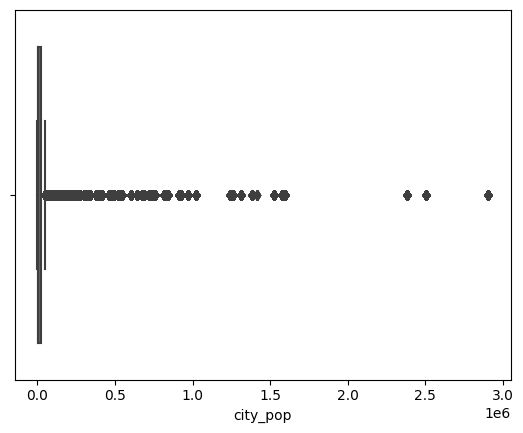

In [61]:
sns.boxplot(data=train_df, x="city_pop")

### RobustScaler

In [62]:
scaler = RobustScaler()
train_df["city_pop"] = scaler.fit_transform(train_df[["city_pop"]])
test_df["city_pop"] = scaler.transform(test_df[["city_pop"]])

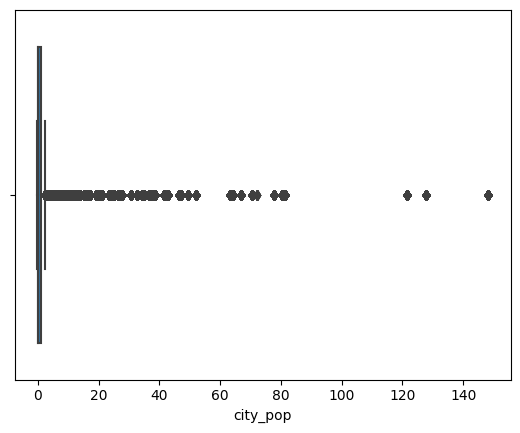

In [63]:
sns.boxplot(data= train_df, x="city_pop")
plt.show();

### PowerTransformer

In [64]:
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
power_transformer = PowerTransformer(method='yeo-johnson', standardize=False)

# Fit and transform the data
train_df["city_pop"] = power_transformer.fit_transform(train_df[["city_pop"]])
test_df["city_pop"] = power_transformer.transform(test_df[["city_pop"]])

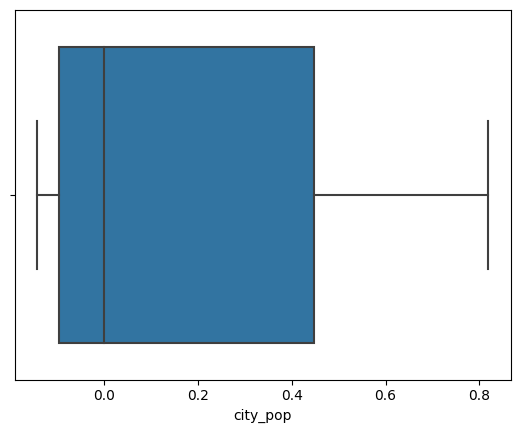

In [65]:
sns.boxplot(data=train_df, x="city_pop")
plt.show();

## job

In [66]:
contingency_table = pd.crosstab(train_df["job"], train_df["is_fraud"])
contingency_table

is_fraud,0,1
job,,
Academic librarian,1030,11
"Accountant, chartered",0,11
"Accountant, chartered certified",525,9
"Accountant, chartered public finance",2571,9
Accounting technician,4640,33
...,...,...
Water engineer,6164,0
Water quality scientist,503,7
Web designer,2538,18


In [67]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("Reject the null hypothesis, there is evidence of a significant association.")
else:
    print("Fail to reject the null hypothesis, there is not enough evidence of a significant association.") 

Reject the null hypothesis, there is evidence of a significant association.


## dob

In [68]:
train_df['dob'] = pd.to_datetime(train_df['dob'])

train_df['dob_year'] = train_df['dob'].dt.year
train_df['dob_month'] = train_df['dob'].dt.month

In [69]:
test_df['dob'] = pd.to_datetime(test_df['dob'])

test_df['dob_year'] = test_df['dob'].dt.year
test_df['dob_month'] = test_df['dob'].dt.month

### dob_year

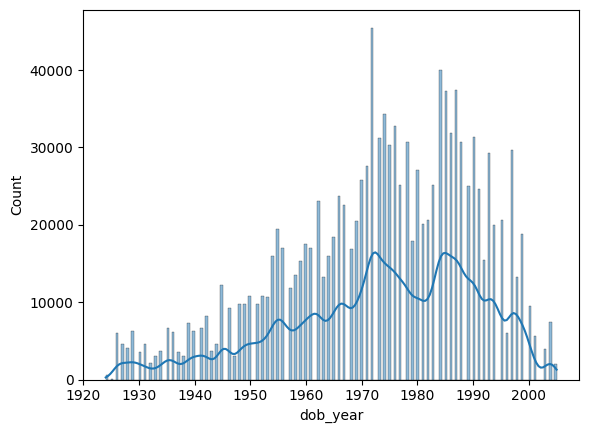

In [70]:
sns.histplot(train_df["dob_year"], kde=True)
plt.show();

In [71]:
negative_dob = train_df.loc[train_df["is_fraud"] == 0,  "dob_year"]
positive_dob = train_df.loc[train_df["is_fraud"] == 1,  "dob_year"]

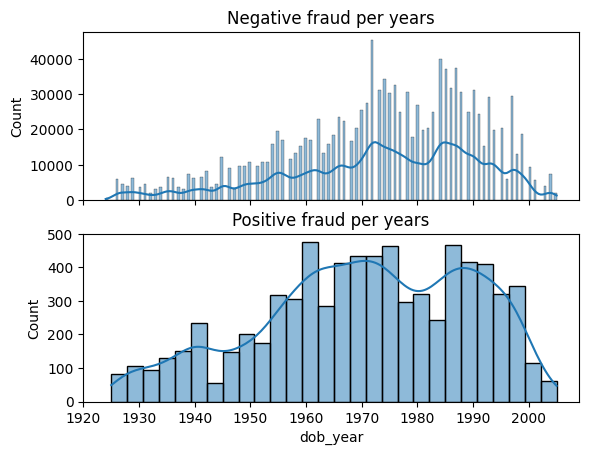

In [72]:
fix, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
sns.histplot(negative_dob, kde=True, ax=ax1)
sns.histplot(positive_dob, kde=True, ax=ax2)
ax1.set_title("Negative fraud per years")
ax2.set_title("Positive fraud per years")
plt.show();

In [73]:
contingency_table = pd.crosstab(train_df["dob_year"], train_df["is_fraud"])
contingency_table

is_fraud,0,1
dob_year,,
1924,536,0
1925,0,11
1926,6038,25
1927,4598,47
1928,4090,41
...,...,...
2000,9473,57
2001,5545,58
2003,3954,21


In [74]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("Reject the null hypothesis, there is evidence of a significant association.")
else:
    print("Fail to reject the null hypothesis, there is not enough evidence of a significant association.")

Reject the null hypothesis, there is evidence of a significant association.


In [75]:
scaler = RobustScaler()
train_df[['dob_year']] = scaler.fit_transform(train_df[['dob_year']])
test_df[['dob_year']] = scaler.transform(test_df[['dob_year']])

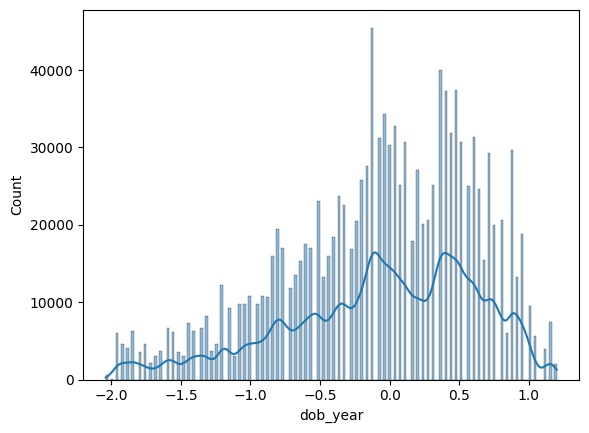

In [76]:
sns.histplot(train_df["dob_year"], kde=True)
plt.show();

### dob_month

In [77]:
train_df['dob_month'] = np.sin(2 * np.pi * train_df['dob_month'] / 12)
test_df['dob_month'] = np.sin(2 * np.pi * test_df['dob_month'] / 12)

## lat long

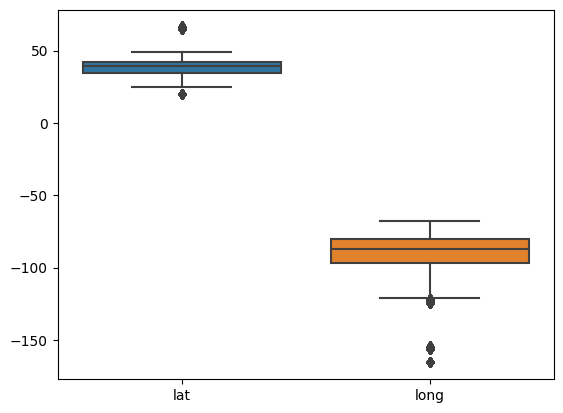

In [78]:
sns.boxplot(data=train_df[['lat', 'long']])
plt.show();

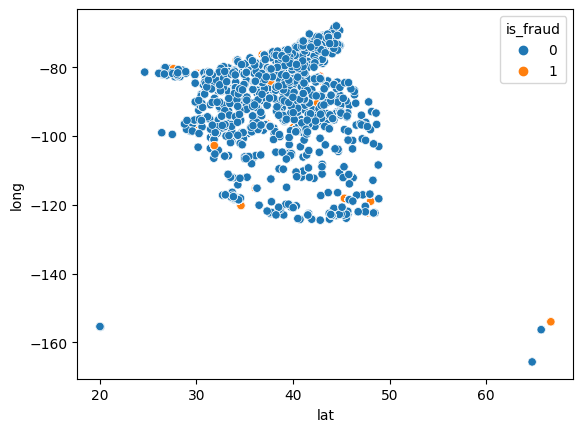

In [79]:
sns.scatterplot(data=train_df, x="lat", y='long', hue='is_fraud')
plt.show();

### RobustScaler

In [80]:
scaler = RobustScaler()
train_df[['lat', 'long']] = scaler.fit_transform(train_df[['lat', 'long']])
test_df[['lat', 'long']] = scaler.transform(test_df[['lat', 'long']])

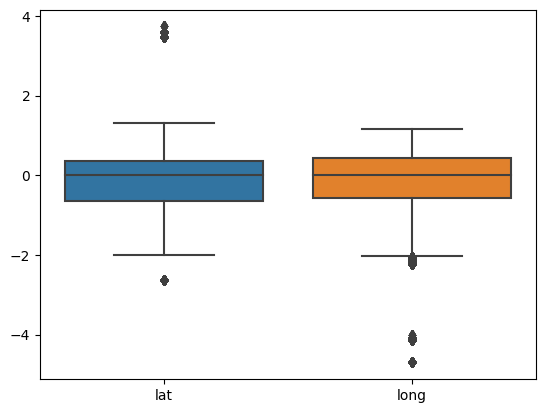

In [81]:
sns.boxplot(data=train_df[['lat', 'long']])
plt.show();

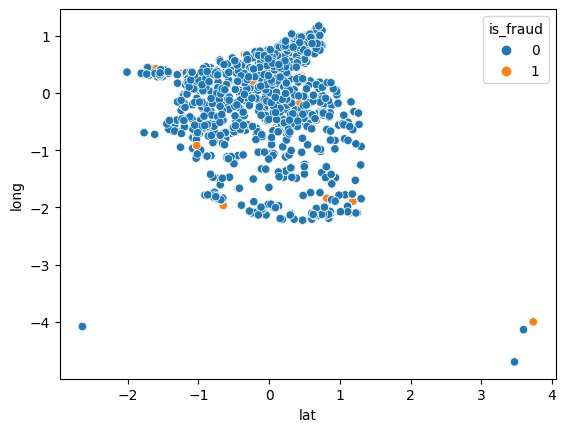

In [82]:
sns.scatterplot(data=train_df, x="lat", y='long', hue='is_fraud')
plt.show();

## merch_lat and merch_long

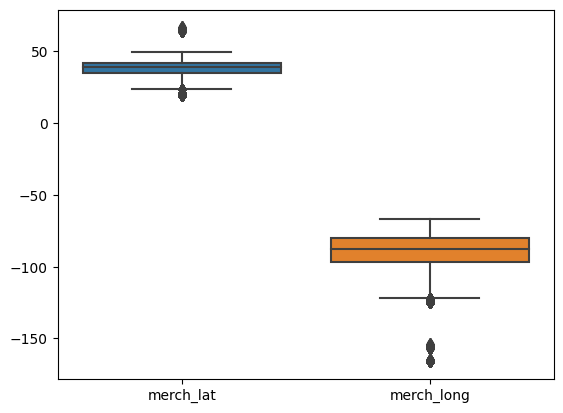

In [83]:
sns.boxplot(data=train_df[['merch_lat', 'merch_long']])
plt.show();

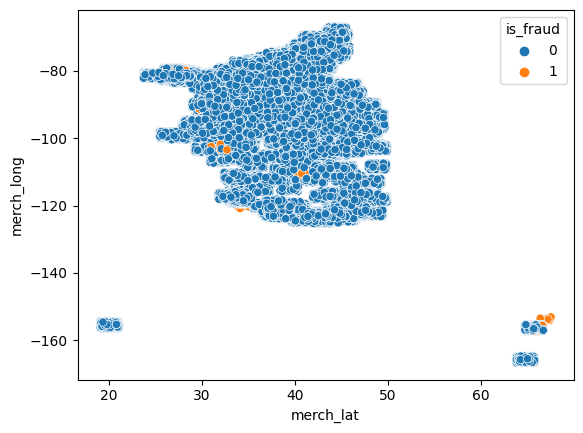

In [84]:
sns.scatterplot(data=train_df, x="merch_lat", y='merch_long', hue='is_fraud')
plt.show();

### RobustScaler

In [85]:
scaler = RobustScaler()
train_df[['merch_lat', 'merch_long']] = scaler.fit_transform(train_df[['merch_lat', 'merch_long']])
test_df[['merch_lat', 'merch_long']] = scaler.transform(test_df[['merch_lat', 'merch_long']])

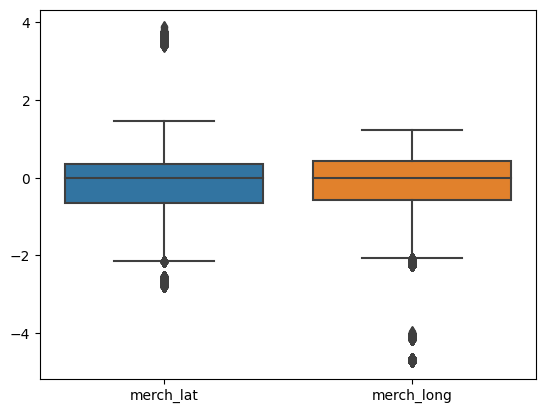

In [86]:
sns.boxplot(data=train_df[['merch_lat', 'merch_long']])
plt.show();

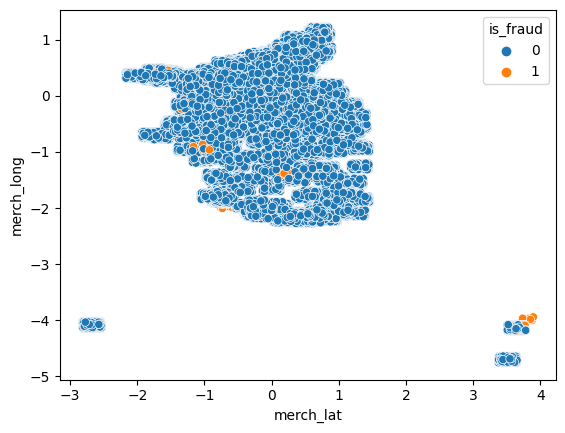

In [87]:
sns.scatterplot(data=train_df, x="merch_lat", y='merch_long', hue='is_fraud')
plt.show();

# preprocessing

## remove columns

In [88]:
train_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'year', 'month', 'day', 'hour', 'week_day',
       'dob_year', 'dob_month'],
      dtype='object')

In [89]:
removed_columns = ["trans_date_trans_time", "first", "last", "dob", "trans_num", "unix_time"]

In [90]:
train_df.drop(removed_columns, axis=1, inplace=True)
test_df.drop(removed_columns, axis=1, inplace=True)

## split dataframe to X and y

In [91]:
X_train, y_train = train_df.drop("is_fraud", axis=1), train_df['is_fraud']
X_test, y_test = test_df.drop("is_fraud", axis=1), test_df['is_fraud']

## OverSamping and UnderSampling

In [92]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(sampling_strategy='minority')
rus = RandomUnderSampler(sampling_strategy='majority')

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)

X_train, y_train = X_train_resampled, y_train_resampled

In [93]:
y_train.value_counts()

is_fraud
0    1289169
1    1289169
Name: count, dtype: int64

## save

In [94]:
import joblib
joblib.dump((X_train, y_train, X_test, y_test), 'data.joblib')

['data.joblib']

## load

In [95]:
# import joblib
# # Load the data
# X_train_loaded, y_train_loaded, X_test_loaded, y_test_loaded = joblib.load('data.joblib')

In [96]:
# X_train, y_train, X_test, y_test  =  X_train_loaded, y_train_loaded, X_test_loaded, y_test_loaded

## choose subset of train and test

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
size1 = 1/5
X_train, X_subset, y_train, y_subset = train_test_split(
    X_train, y_train, train_size=size1, stratify=y_train,
)

In [99]:
size2 = 1/10
X_test, X_test_subset, y_test, y_test_subset = train_test_split(
    X_test, y_test, train_size=size2, stratify=y_test
)

In [100]:
y_train.shape, y_train.unique()

((515667,), array([0, 1]))

In [101]:
y_test.shape, y_test.unique()

((55571,), array([0, 1]))

## column transforming

In [102]:
one_hot_columns = ["cc_num", 'merchant', 'category', 'gender', 'street', 'city', 'state', 'zip', 'job']

column_transformer = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(handle_unknown='ignore'), one_hot_columns)
    ],
    remainder='passthrough'
)

X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

# Train

In [103]:
from sklearn.metrics import confusion_matrix, classification_report
def calculate_metrics(y_test, y_pred):# Calculate precision, recall, and F1 score
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    report_str = classification_report(y_test, y_pred, output_dict=False)
    
    return conf_matrix, report, report_str

## ml models

### SGDClassifier

In [104]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()

sgd_clf.fit(X_train, y_train)

y_pred1 = sgd_clf.predict(X_test)

conf_matrix1, report1, report_str1 = calculate_metrics(y_test, y_pred1)
print(conf_matrix1)
print(report_str1)

[[47961  7396]
 [  193    21]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     55357
           1       0.00      0.10      0.01       214

    accuracy                           0.86     55571
   macro avg       0.50      0.48      0.47     55571
weighted avg       0.99      0.86      0.92     55571



### MLP

In [105]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model
mlp_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred2 = mlp_clf.predict(X_test)

conf_matrix2, report2, report_str2 = calculate_metrics(y_test, y_pred2)
print(conf_matrix2)
print(report_str2)

[[55306    51]
 [  206     8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55357
           1       0.14      0.04      0.06       214

    accuracy                           1.00     55571
   macro avg       0.57      0.52      0.53     55571
weighted avg       0.99      1.00      0.99     55571



### KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred3 = knn.predict(X_test)

conf_matrix3, report3, report_str3 = calculate_metrics(y_test, y_pred3)
print(conf_matrix3)
print(report_str3)

[[53251  2106]
 [  198    16]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     55357
           1       0.01      0.07      0.01       214

    accuracy                           0.96     55571
   macro avg       0.50      0.52      0.50     55571
weighted avg       0.99      0.96      0.98     55571



### RandomForestClassifier

In [107]:
from sklearn.ensemble import RandomForestClassifier

random_forest_clf = RandomForestClassifier(n_estimators=200)

random_forest_clf.fit(X_train, y_train)

y_pred4 = random_forest_clf.predict(X_test)

conf_matrix4, report4, report_str4 = calculate_metrics(y_test, y_pred4)
print(conf_matrix4)
print(report_str4)

[[55340    17]
 [  147    67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55357
           1       0.80      0.31      0.45       214

    accuracy                           1.00     55571
   macro avg       0.90      0.66      0.72     55571
weighted avg       1.00      1.00      1.00     55571



### AdaBoostClassifier

In [108]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adabc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)

adabc.fit(X_train, y_train)

y_pred5 = adabc.predict(X_test)

conf_matrix5, report5, report_str5 = calculate_metrics(y_test, y_pred5)
print(conf_matrix5)
print(report_str5)

[[52920  2437]
 [   38   176]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     55357
           1       0.07      0.82      0.12       214

    accuracy                           0.96     55571
   macro avg       0.53      0.89      0.55     55571
weighted avg       1.00      0.96      0.97     55571



### BaggingClassifier

In [109]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bgc = BaggingClassifier(DecisionTreeClassifier(),n_estimators=200)

bgc.fit(X_train, y_train)

y_pred6 = bgc.predict(X_test)

conf_matrix6, report6, report_str6 = calculate_metrics(y_test, y_pred6)
print(conf_matrix6)
print(report_str6)

[[55026   331]
 [   37   177]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     55357
           1       0.35      0.83      0.49       214

    accuracy                           0.99     55571
   macro avg       0.67      0.91      0.74     55571
weighted avg       1.00      0.99      0.99     55571



### SVM

In [110]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

# Make predictions on test data
y_pred7 = svm.predict(X_test)

conf_matrix7, report7, report_str7 = calculate_metrics(y_test, y_pred7)
print(conf_matrix7)
print(report_str7)

[[55175   182]
 [  160    54]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55357
           1       0.23      0.25      0.24       214

    accuracy                           0.99     55571
   macro avg       0.61      0.62      0.62     55571
weighted avg       0.99      0.99      0.99     55571



## compare models

In [111]:
models = [sgd_clf, mlp_clf, knn, random_forest_clf, adabc, bgc, svm]
model_names = [type(model).__name__ for model in models]
classification_reports = [report1, report2, report3, report4, report5, report6, report7]

In [112]:
columns = ['Model', 'Precision', 'Recall', 'F1-Score', 'Support']
comparison_df = pd.DataFrame(columns=columns)

data_list = []

# Populate the list of dictionaries with results
for model_name, report in zip(model_names, classification_reports):
    # Check if 'weighted avg' is present and if report is a dictionary
    if isinstance(report, dict) and 'weighted avg' in report:
        metrics = report['1']
        model_data = {
            'Model': model_name,
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1-Score': metrics['f1-score'],
            'Support': metrics['support']
        }
        data_list.append(model_data)
    else:
        print(f"Invalid report for {model_name}")


# Convert the list of dictionaries to a DataFrame
comparison_df = pd.DataFrame(data_list, columns=columns)


# Display the comparison DataFrame
print(comparison_df)

                    Model  Precision    Recall  F1-Score  Support
0           SGDClassifier   0.002831  0.098131  0.005504      214
1           MLPClassifier   0.135593  0.037383  0.058608      214
2    KNeighborsClassifier   0.007540  0.074766  0.013699      214
3  RandomForestClassifier   0.797619  0.313084  0.449664      214
4      AdaBoostClassifier   0.067356  0.822430  0.124514      214
5       BaggingClassifier   0.348425  0.827103  0.490305      214
6                     SVC   0.228814  0.252336  0.240000      214


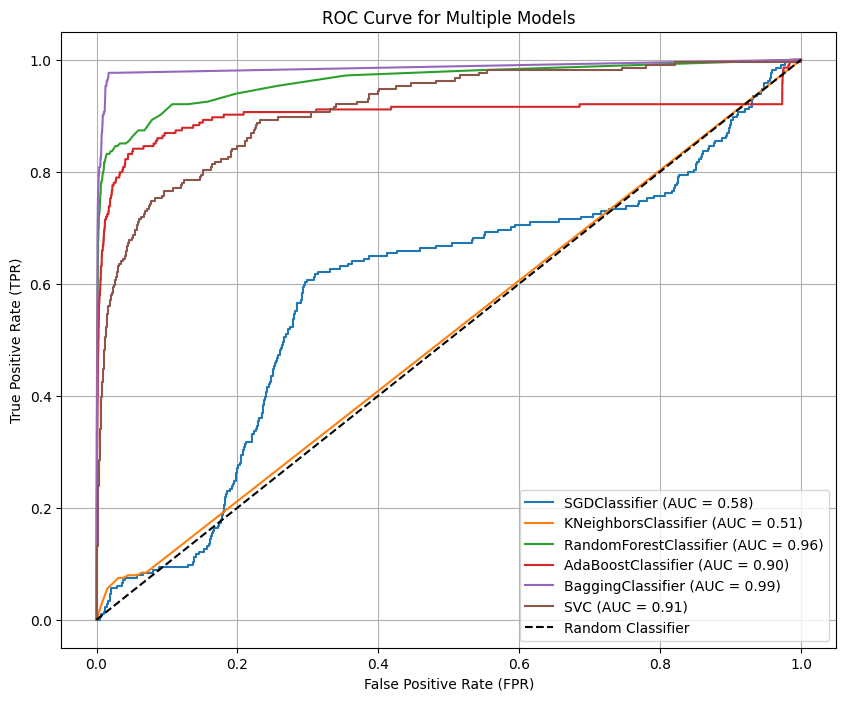

In [113]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
counter = 0

for model, name in zip(models, model_names):
    counter += 1

    # Skip the second model
    if counter == 2:
        continue

    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    label = f'{name} (AUC = {roc_auc:.2f})'
    plt.plot(fpr, tpr, label=label)

# Plot the random classifier for reference (diagonal line)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Customize the plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Multiple Models')
plt.legend()
plt.grid(True)
plt.show()
